## Data exploration
A notebook for looking at the data and playing around with it.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
# Postings (comments under articles of Der Standard)
posting_1 = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')
posting_2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')
postings = pd.concat([posting_1, posting_2])
postings

,ID_Posting,ID_Posting_Parent,ID_CommunityIdentity,PostingHeadline,PostingComment,PostingCreatedAt,ID_Article,ArticlePublishingDate,ArticleTitle,ArticleChannel,ArticleRessortName,UserCommunityName,UserGender,UserCreatedAt
0,1041073586,1.041073e+09,671476,Das hat gestern bereits der Voggenhuber angefü...,schieder hatte dem inhaltlich nichts entgegenz...,2019-05-01 18:21:15.127,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
1,1041073839,1.041073e+09,566938,NaN,...und meinen Bezirk bekommst du als Erbe mit.,2019-05-01 18:28:22.040,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,AlphaRomeo,m,2015-08-28 17:07:41.110
2,1041073872,1.041069e+09,669286,NaN,"Nein, bei der ÖVP/FPÖ genauso passiert. Ich wo...",2019-05-01 18:29:05.533,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Hpolditsch,NaN,2018-03-06 20:03:42.737
3,1041080734,1.041080e+09,671476,Sie haben doch nichts gefordert??,sie haben nur die regierung kritisiert. das di...,2019-05-01 22:37:56.010,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
4,1041080828,NaN,671476,Heute wäre der perfekte Tag für die SPÖ gewese...,"ihr noch nicht erfülltes versprechen, den silb...",2019-05-01 22:42:06.310,2000102330973,2019-05-01 10:28:57.49,1. Mai in Wien: SPÖ fordert von Strache Rücktritt,Inland,Parteien,Ravenspower,NaN,2018-04-14 13:42:28.470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395929,1042380731,1.042380e+09,553628,NaN,Vermutlich gar keines...mir ist jedenfalls kei...,2019-06-04 08:54:54.177,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395930,1042381030,NaN,553628,NaN,*winkt dankbar zur Gödelnummer* Du bist echt d...,2019-06-04 09:04:32.037,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395931,1042381528,1.042381e+09,553628,NaN,"Die sind noch in Arbeit, aber der Surface läuf...",2019-06-04 09:22:54.473,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280
395932,1042381793,1.042380e+09,553628,NaN,"Ich versteh das überhaupt nicht, warum so viel...",2019-06-04 09:31:45.077,2000103620997,2019-05-24 09:01:27.00,Off-Topic-Forum #123,User,Off-Topic,404 not found,NaN,2014-12-06 15:15:06.280


In [30]:
print(f'Number of rows in the total dataframe: {len(postings)}')
print(f'Number of unique comment ids: {len(postings["ID_Posting"].unique())}')
print(f'Proportion of comments which are replies to other comments: {len(postings[postings["ID_Posting_Parent"].notnull()]) *100/ len(postings):.3} %')
print(f'Number of unique users: {len(postings["ID_CommunityIdentity"].unique())}')
print(f'Proportion of comments with a headline: {len(postings[postings["PostingHeadline"].notnull()])  *100/ len(postings):.3} %')
print(f'Proportion of comments with content: {len(postings[postings["PostingComment"].notnull()]) *100/ len(postings):.3} %')
print(f'Number of unique articles: {len(postings["ID_Article"].unique())}')
print(f'Number of unique article channels: {len(postings["ArticleChannel"].unique())}')
print(f'Number of unique article ressorts: {len(postings["ArticleRessortName"].unique())}')

Number of rows in the total dataframe: 739094
Number of unique comment ids: 739094
Proportion of comments which are replies to other comments: 67.7 %
Number of unique users: 23925
Proportion of comments with a headline: 28.0 %
Proportion of comments with content: 91.6 %
Number of unique articles: 4351
Number of unique article channels: 22
Number of unique article ressorts: 689


In [31]:
# most active users:
postings['ID_CommunityIdentity'].value_counts()

ID_CommunityIdentity
518647    1677
37541     1410
516173    1371
59327     1235
499749    1226
          ... 
535622       1
505487       1
574625       1
692361       1
655206       1
Name: count, Length: 23925, dtype: int64

In [32]:
# user gender:
postings['UserGender'].value_counts()

UserGender
m    470935
w     78734
Name: count, dtype: int64

In [33]:
# user gender:
men_comments = len(postings[postings['UserGender'] == 'm'])
women_comments = len(postings[postings['UserGender'] == 'w'])
nan_comments = len(postings[postings['UserGender'].isnull()])
total_comments = len(postings)
number_men = len(postings[postings['UserGender'] == 'm']['ID_CommunityIdentity'].unique())
number_women = len(postings[postings['UserGender'] == 'w']['ID_CommunityIdentity'].unique())
number_nan = len(postings[postings['UserGender'].isnull()]['ID_CommunityIdentity'].unique())
number_total = number_men + number_women + number_nan
print(f"Number of comments by users registered as men: {men_comments} ({men_comments*100/total_comments:.3} %)")
print(f"Number of comments by users registered as women: {women_comments} ({women_comments*100/total_comments:.3} %)")
print(f"Number of comments by users without registered gender: {nan_comments} ({nan_comments*100/total_comments:.3} %) ")
print(f"Number of users registered as men: {number_men} ({number_men*100/number_total:.3} %)")
print(f"Number of users registered as women: {number_women} ({number_women*100/number_total:.3} %)")
print(f"Number of users without registered gender: {number_nan} ({number_nan*100/number_total:.3} %)")

Number of comments by users registered as men: 470935 (63.7 %)
Number of comments by users registered as women: 78734 (10.7 %)
Number of comments by users without registered gender: 189425 (25.6 %) 
Number of users registered as men: 15370 (64.2 %)
Number of users registered as women: 2489 (10.4 %)
Number of users without registered gender: 6066 (25.4 %)


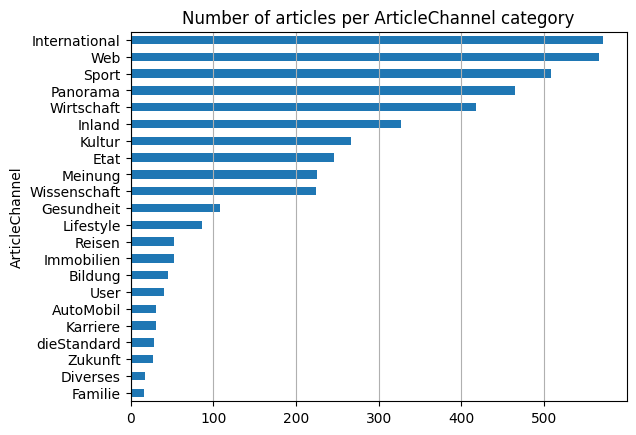

In [51]:
# Number of articles by ArticleChannel category:
Acn = postings.groupby('ArticleChannel')['ID_Article'].nunique().sort_values()
Acn.plot(kind='barh')
plt.title('Number of articles per ArticleChannel category')
plt.grid(axis='x')
plt.show()

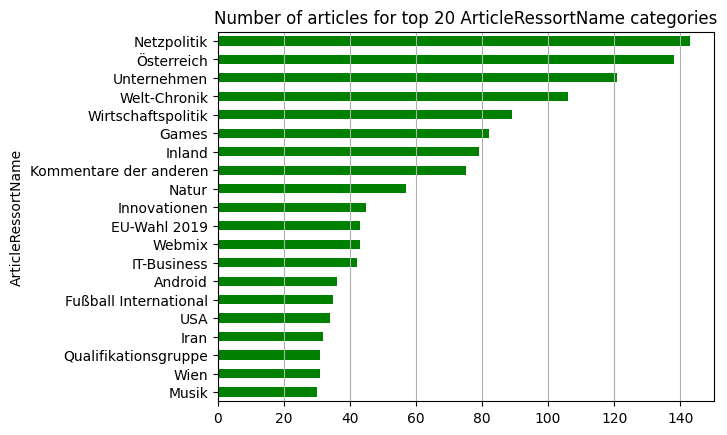

In [52]:
# Number of articles by ArticleRessortName category:
Arn = postings.groupby('ArticleRessortName')['ID_Article'].nunique()
Arn.nlargest(20).iloc[::-1].plot(kind='barh', color='green')
plt.title('Number of articles for top 20 ArticleRessortName categories')
plt.grid(axis='x')
plt.show()

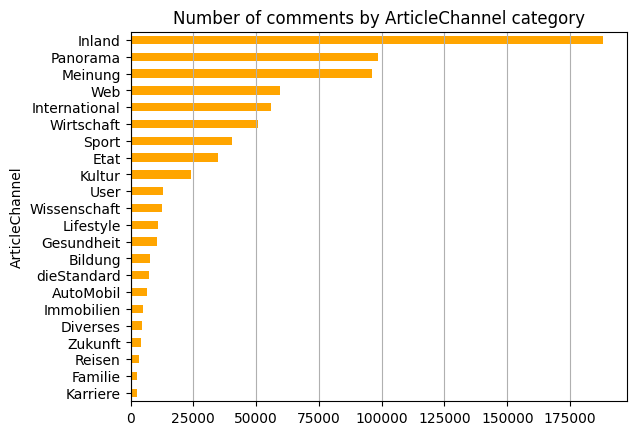

In [53]:
# Number of comments by ArticleChannel category:
Acc = postings['ArticleChannel'].value_counts()[::-1]
Acc.plot(kind='barh', color='orange')
plt.title('Number of comments by ArticleChannel category')
plt.grid(axis='x')
plt.show()

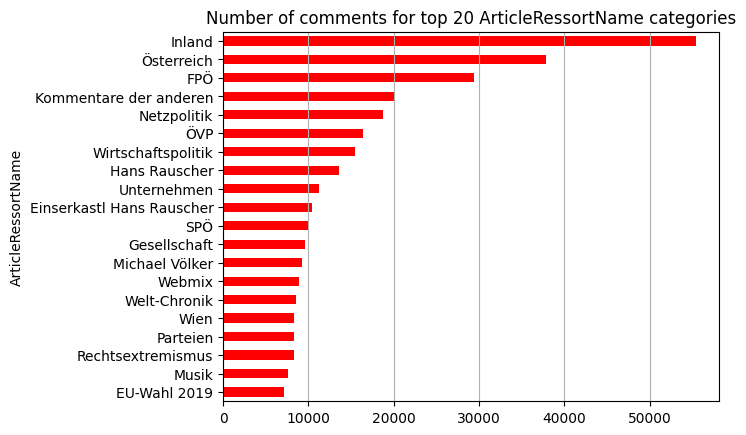

In [54]:
# Number of comments by ArticleRessortName category:
Arc = postings['ArticleRessortName'].value_counts()
Arc.nlargest(20).iloc[::-1].plot(kind='barh', color='red')
plt.title('Number of comments for top 20 ArticleRessortName categories')
plt.grid(axis='x')
plt.show()

In [55]:
postings["ArticleChannel"].unique()

array(['Inland', 'Meinung', 'International', 'Sport', 'Panorama',
       'Wirtschaft', 'Gesundheit', 'Web', 'Kultur', 'Bildung',
       'Wissenschaft', 'Immobilien', 'User', 'dieStandard', 'Etat',
       'Zukunft', 'Karriere', 'Lifestyle', 'Diverses', 'Reisen',
       'AutoMobil', 'Familie'], dtype=object)

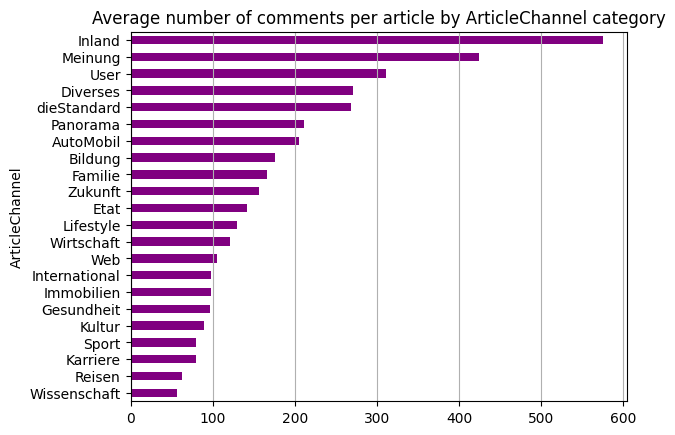

In [63]:
# Number of comments by ArticleChannel category:
Cpac = Acc / Acn
Cpac.name = 'Comments per article'
Cpac.sort_values().plot(kind='barh', color='purple')
plt.title('Average number of comments per article by ArticleChannel category')
plt.grid(axis='x')
plt.show()

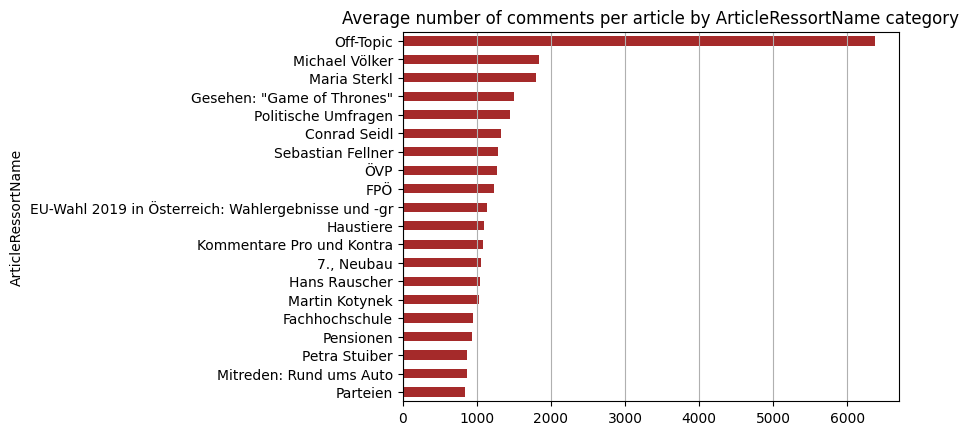

In [65]:
# Number of comments by ArticleRessortName category:
Cpar = Arc / Arn
Cpar.name = 'Comments per article'
Cpar.nlargest(20).iloc[::-1].plot(kind='barh', color='brown')
plt.title('Average number of comments per article by ArticleRessortName category')
plt.grid(axis='x')
plt.show()